# EDA: DecisionTree

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# preprocess
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# import model
from sklearn.tree import DecisionTreeClassifier

# Train-Test
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('CLEANDATA/clean_data_N2.csv', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882247 entries, 0 to 882246
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   LIGHTING_CONDITION         882247 non-null  object
 1   CRASH_TYPE                 882247 non-null  object
 2   DAMAGE                     882247 non-null  object
 3   NUM_UNITS                  882247 non-null  int64 
 4   MOST_SEVERE_INJURY         882247 non-null  object
 5   CRASH_HOUR                 882247 non-null  int64 
 6   CRASH_DAY_OF_WEEK          882247 non-null  int64 
 7   CRASH_MONTH                882247 non-null  int64 
 8   SEC_CONTRIBUTORY_CAUSE_N   882247 non-null  object
 9   PRIM_CONTRIBUTORY_CAUSE_N  882247 non-null  object
 10  TRAFFICWAY_TYPE_N          882247 non-null  object
 11  ROAD_DEFECT_N              882247 non-null  object
 12  ROADWAY_SURFACE_COND_N     882247 non-null  object
 13  FIRST_CRASH_TYPE_N         882247 non-null  

In [4]:
sample_df = df.sample(n=16000, random_state=1)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 597559 to 687717
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   LIGHTING_CONDITION         16000 non-null  object
 1   CRASH_TYPE                 16000 non-null  object
 2   DAMAGE                     16000 non-null  object
 3   NUM_UNITS                  16000 non-null  int64 
 4   MOST_SEVERE_INJURY         16000 non-null  object
 5   CRASH_HOUR                 16000 non-null  int64 
 6   CRASH_DAY_OF_WEEK          16000 non-null  int64 
 7   CRASH_MONTH                16000 non-null  int64 
 8   SEC_CONTRIBUTORY_CAUSE_N   16000 non-null  object
 9   PRIM_CONTRIBUTORY_CAUSE_N  16000 non-null  object
 10  TRAFFICWAY_TYPE_N          16000 non-null  object
 11  ROAD_DEFECT_N              16000 non-null  object
 12  ROADWAY_SURFACE_COND_N     16000 non-null  object
 13  FIRST_CRASH_TYPE_N         16000 non-null  object
 14  WEATH

In [5]:
X = sample_df.drop('DAMAGE', axis=1)
y = sample_df['DAMAGE']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((11200, 16), (4800, 16))

In [7]:
ss = StandardScaler(with_mean=False)
encoder = OneHotEncoder(handle_unknown='ignore')

In [8]:
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [9]:
X_train_scaled = ss.fit_transform(X_train_encoded)
X_test_scaled = ss.transform(X_test_encoded)

In [10]:
model = DecisionTreeClassifier()

In [11]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [12]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [13]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [14]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.6240178571428572


In [15]:
#importance = model.feature_importances_

In [16]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [17]:
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)

In [18]:
model.score(X_train_scaled, y_train)

0.6473214285714286

In [19]:
model.score(X_test_scaled, y_test)

0.6375

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.47      0.14      0.22       558
$501 - $1,500       0.27      0.02      0.05      1162
  OVER $1,500       0.65      0.96      0.78      3080

     accuracy                           0.64      4800
    macro avg       0.47      0.38      0.35      4800
 weighted avg       0.54      0.64      0.53      4800



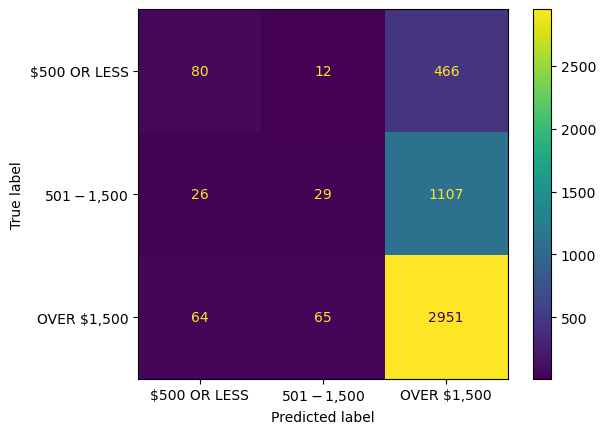

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [23]:
correlation = sample_df.corr()['DAMAGE'].sort_values(ascending=False)
print(correlation)

ValueError: could not convert string to float: 'UNKNOWN'